# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
#vamos ler o data set e inspeciona-lo
athletes = pd.read_csv("athletes.csv")

athletes.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [4]:
athletes.head(8)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0


In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

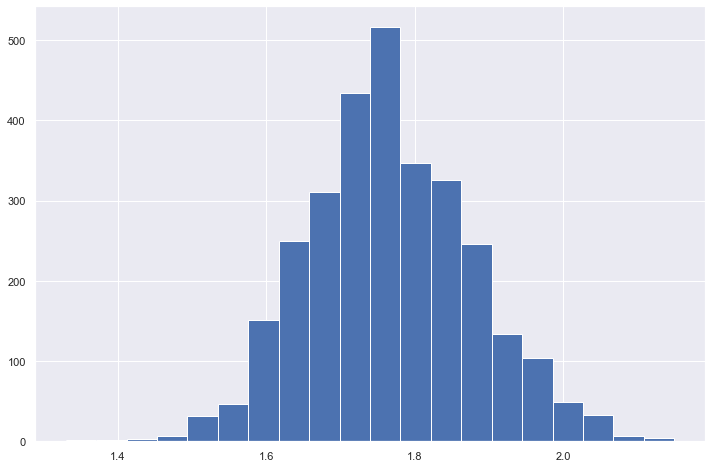

In [6]:
# Coletando a amostra requisitada para as primeiras questões
height_sample= get_sample(athletes, 'height', 3000)

plt.hist(height_sample, bins = 20)
plt.show()

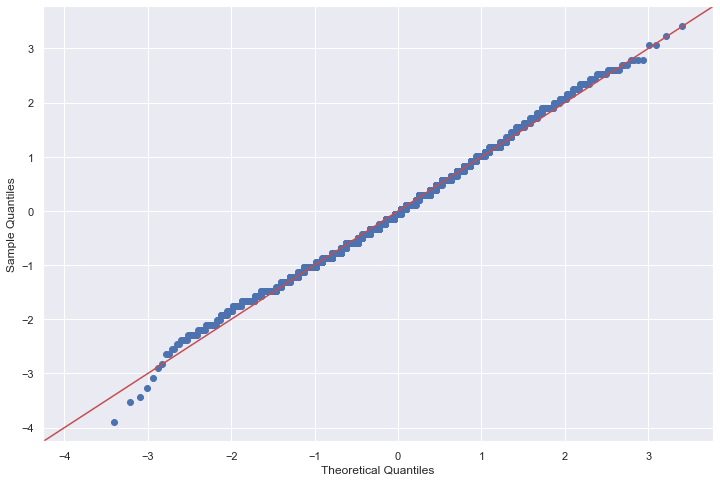

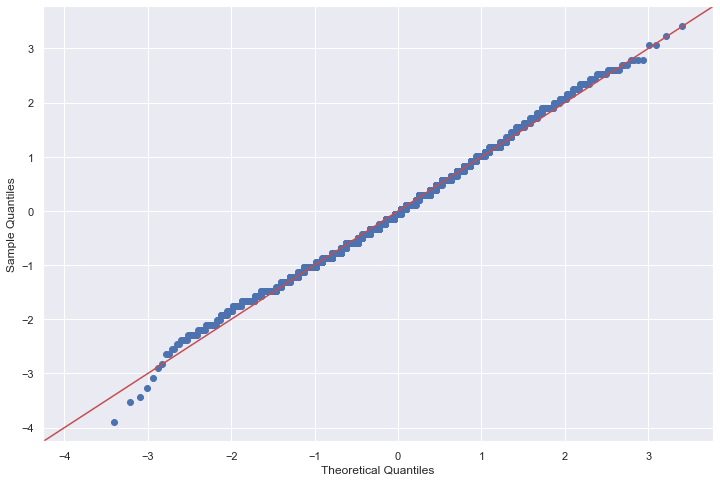

In [7]:
import statsmodels.api as sm

# fazendo uma avaliação visual da 'normalidade'
sm.qqplot(height_sample, fit=True, line='45')

In [8]:
#executando o teste de normalidade requerido...
stat, p = sct.shapiro(height_sample)

print(stat)
print(p)

# valide com um nível de significância de 5%
alpha = 0.05


0.9961519837379456
5.681722541339695e-07


Lembrando que:

![title](p_test.png)


In [9]:
# H0 ou hipótese nula é que as alturas são normalmente distribuídas

if p > alpha:
    fail_to_reject_h0_q1 = True
else:
    fail_to_reject_h0_q1 = False
    
print(fail_to_reject_h0_q1)


False


In [10]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return fail_to_reject_h0_q1

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

Você pode achar uma boa descrição deste teste aqui: [teste de Jarque-Bera](https://towardsdatascience.com/testing-for-normality-using-skewness-and-kurtosis-afd61be860)

In [11]:
# usando o teste recomendado  
jb_value, p = sct.jarque_bera(height_sample)

print(jb_value)
print(p)

#alpha já foi definido
# e H0 continua a mesma

if p > alpha:
    fail_to_reject_h0_q2 = True
else:
    fail_to_reject_h0_q2 = False

print(fail_to_reject_h0_q2)

13.03363513594265
0.001478366424594868
False


In [12]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return fail_to_reject_h0_q2

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

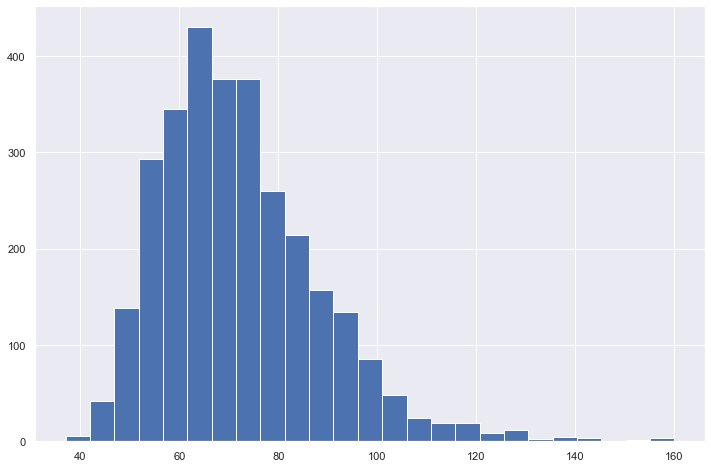

In [13]:
# amostrando a coluna dos pesos e inspecionando
weight_sample = get_sample(athletes, 'weight', 3000)

plt.hist(weight_sample, bins=25)
plt.show()

Percebe-se algum skew

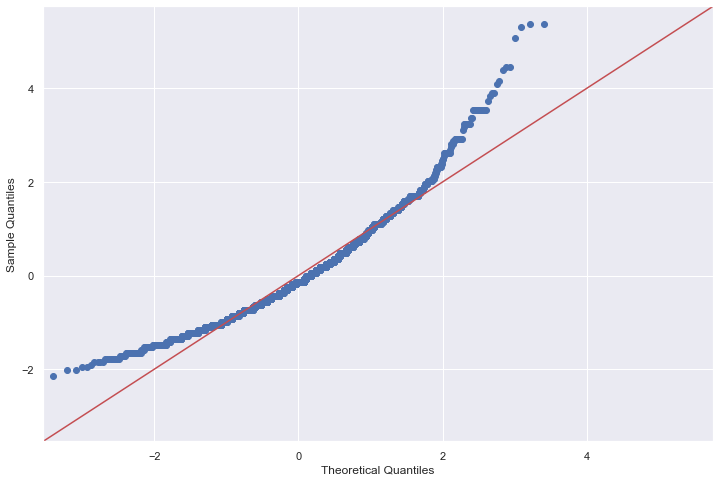

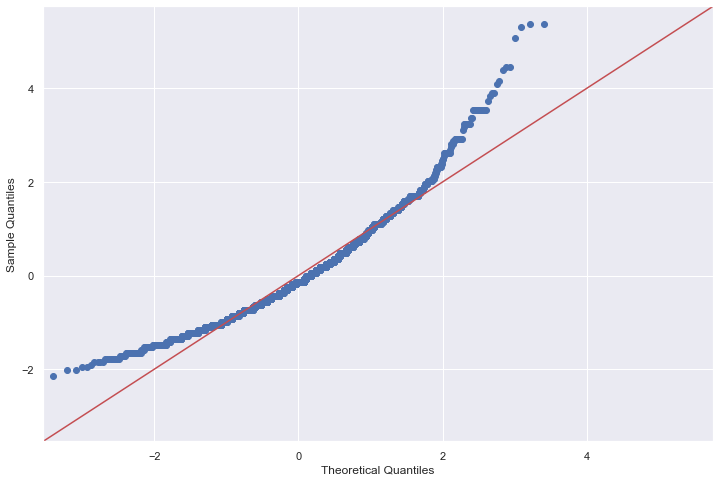

In [14]:
sm.qqplot(weight_sample, fit=True, line='45')

Já não parece tão 'normal' quanto a outra!!!

In [15]:
# usando o teste de D'Agostino-Pearson
stat, p = sct.normaltest(weight_sample)
print(stat)
print(p)

# comparando com o jarque-bera por curiosidade
jb_value, p_jb = sct.jarque_bera(weight_sample)
print('Jarque-Bera')
print(jb_value)
print(p_jb)


if p > alpha:
    fail_to_reject_h0_q3 = True
else:
    fail_to_reject_h0_q3 = False


print(fail_to_reject_h0_q3)

510.24655809881176
1.5898922918029537e-111
Jarque-Bera
993.7964649405459
0.0
False


In [16]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return fail_to_reject_h0_q3

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [17]:
# aplicando o log nos valores
stat, p = sct.normaltest(np.log(weight_sample))

print(stat)
print(p)


if p > alpha:
    fail_to_reject_h0_q4 = True
else:
    fail_to_reject_h0_q4 = False

print(fail_to_reject_h0_q4)

# conferindo com jarque-bera
jb_value, p_jb = sct.jarque_bera(np.log(weight_sample))
print('Jarque-Bera')
print(jb_value)
print(p_jb)



45.91534331977353
1.0705572101256944e-10
False
Jarque-Bera
47.64955630265282
4.498112993189807e-11


In [18]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return fail_to_reject_h0_q4

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [19]:
# Fazendo o recorte das nacionalidades requeridas e eliminando os valores nulos

height_bra = athletes[athletes['nationality'] == 'BRA']['height'].dropna()

height_usa = athletes[athletes['nationality'] == 'USA']['height'].dropna()

height_can = athletes[athletes['nationality'] == 'CAN']['height'].dropna()

# good catch dos meus colegas de bootcamp! 
# devemos usar equal_var= False, para aplicar o teste de Welch pois o tamanho das amostras (delegações) e variancias
# são diferentes
stat, p = sct.ttest_ind(height_bra, height_usa, equal_var=False)
print(stat)
print(p)


if p > alpha:
    fail_to_reject_h0_q5 = True
else:
    fail_to_reject_h0_q5 = False

print(fail_to_reject_h0_q5)

len(height_can)

-3.2232436467501553
0.0013080041830144061
False


320

Justificativa para usar o [teste de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [20]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return fail_to_reject_h0_q5

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [21]:
stat, p = sct.ttest_ind(height_bra, height_can, equal_var=False)

print(stat)
print(p)

alpha = 0.05

if p > alpha:
    fail_to_reject_h0_q6 = True
else:
    fail_to_reject_h0_q6 = False


print(fail_to_reject_h0_q6)

0.638930491436537
0.5230827295443041
True


In [22]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return fail_to_reject_h0_q6

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [23]:
stat, p = sct.ttest_ind(height_usa, height_can,equal_var=False)

print(stat)
print(p)


3.516987632488539
0.00046601293473888875


In [24]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return round(p,8)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?